In [2]:
import numpy as np
import autograd.numpy as anp
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

In [3]:
"""Plot font serif or sans serif (default)"""

plt.rcParams["font.family"] = "serif" #"sans serif"
plt.rcParams["mathtext.default"] = "regular"

In [4]:
def color(scheme, number, start, stop):
    cm_subsection = np.linspace(start,stop,number) 
    cm_map = cm.get_cmap()
    return [ cm_map(x) for x in cm_subsection ]

# Statistics Notes

Leonie Einfalt, University of Vienna, HEPHY Vienna

The following notes are based on:
1. *Statistical Data Analysis*; Glen Cowan; Clarendon Press, 1998
2. *Asymptotic formulae for likelihood-based tests of new physics*; Glen Cowan, Kyle Cranmer, Eilam Gross, Ofer Vitells; Eur. Phys. J. C (2011) 
3. *Exploring light mediators with low-threshold direct detection experiments*; Felix Kahlhoefer, Suchita Kulkarni and Sebastian Wild

## pdfs, p-values and null-hypothesis testing

The outcome of an experiment is denoted as $n_{\rm obs}$ (number of observed events). If the number of observed
events $n_{\rm obs}$ are less than the expected number of events $s + b$, the signal+background hypothesis is rejected,
where $s$; $b$ are expected number of signal and background events (obtained from the theory/model). In a counting experiment the probability to observe $n$ (integer) events is usually approximated by a Poisson distribution
$$Po(n_{\rm obs}|\lambda)=\frac{\lambda^{n_{\rm obs}}e^{-\lambda}}{n_{\rm obs}!},$$
where $\lambda$ is the number of expected events ($\lambda = s; b; s + b$ for signal-only, background-only, signal+background
hypothesis).


In [41]:
'''analytical approach'''
def Po(n,lam):
    size = np.size(n)
    if size == 1:
        prob = (lam**(n)*np.exp(-lam))/(np.math.factorial(n))
    else:
        prob = np.zeros(np.size(n))
        for i in range(0,np.size(n)):
            prob[i]=(lam**(n[i])*np.exp(-lam))/(np.math.factorial(n[i]))
    return prob

In [42]:
'''statistics/ MC approach'''
def Po_stat(s,b):
    mu = b+s
    x = np.arange(stats.poisson.ppf(0.0001, mu),stats.poisson.ppf(0.9999, mu))
    Po = stats.poisson.pmf(x,mu)
    return x, Po
def Po_sample(s,b,size):
    mu = b+s
    sample = stats.poisson.rvs(mu, size=size)
    return sample

The p-value $p_{b}$ tells us how likely it is, to observe a sample mean which is as or more extrem then the observed $n_{\rm obs}$. We distinguish between the right-tailed p-value 
$$p_{b} = Po(n\geq n_{\rm obs}|\, b) = \sum_{n_{\rm obs}}^{n=\infty}Po(n|\,b) = 1-\sum_0^{n_{\rm obs}-1}Po(n|\,b)$$
and the left-tailed p-value:
$$p_{b} = Po(n\leq n_{\rm obs}|\, b) = \sum_0^{n_{\rm obs}}Po(n|\,b) $$
We can of course also compute $p_{b+s}$ for the background+signal hypothesis. 

In [43]:
# direction gives left- or right-tail test p-value, nobs gives the number of observed events, n gives the x-axis values 
# of the distribution and p gives the y-axis values of the distribution
def pval(direction,nobs,n,p):
    p_val=0
    if direction == 'left':
        p_array = p[np.where(n<=nobs)]
    elif direction == 'right':
        p_array = p[np.where(n>=nobs)]
    else:
        print('unknown direction of test, choose left or right tail')
    for p_el in p_array:
        p_val += p_el
    return p_val

### Some examples

First look at some random number of observed events and $s,b,s+b$ and have a look at how this changes the probability distribution and p-values for left-tail or right tail. We set the background to a fixed value of $n=100$ events and then add a signal (1,5,10 or 20 events). For a given number of observed events we then calculate the p-value. 

In [44]:
background = 100
signal = np.array([1,5,10,20]) 
xmin, xmax = 40, 140
n_array = np.linspace(xmin,xmax,xmax-xmin+1)

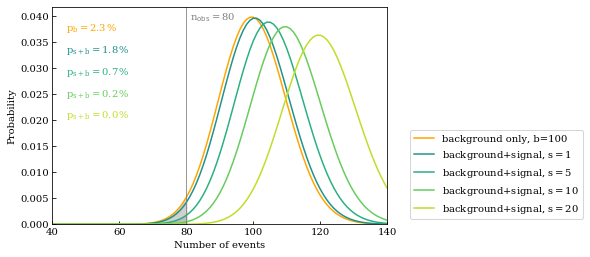

In [45]:
n_obs = 80
fig = plt.figure('Poisson distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(n_array,Po(n_array,background),'orange',
         label=r'background only, b={0}'.format(background))
ax1.text(0.04,0.9, r'$p_{{b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,Po(n_array,background))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'orange')
for i in range(np.size(signal)):
    sb = background+signal[i]
    ax1.plot(n_array,Po(n_array,sb),
        color=color('viridis',np.size(signal),0.5,0.9)[i], 
        label=r'background+signal, $s={0}$'.format(signal[i]))
    ax1.fill_between(n_array,Po(n_array,sb),0, where = (n_array <= n_obs), color = 'grey', alpha = 0.2)
    ax1.text(0.04,0.8-i*0.1, r'$p_{{s+b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,Po(n_array,background+signal[i]))*100), 
             fontsize=10, ha='left', va='center', transform=ax1.transAxes,
            color=color('viridis',np.size(signal),0.5,0.9)[i])
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'Probability')
ax1.set_xlabel(r'Number of events')
ax1.tick_params(right=False,direction='in')
ax1.axvline(x=n_obs, color='grey', linewidth=0.8)
ax1.text(n_obs+1,Po(background,background),r'$n_{{\rm obs}}=${0}'.format(n_obs),ha='left', va='center', color='grey')
ax1.fill_between(n_array,Po(n_array,background),0, where = (n_array <= n_obs), color = 'grey', alpha = 0.2)
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.6,0))
plt.show( block=False )

In this first example we observe far less events then our preset background. In this case the left-tail p-value tells us, that for the background only hypothesis, with a probability of $2.3\,\%$ we would observe a result, that is as or even smaller then the observed. For the background+signal hypothesis this value is lower.

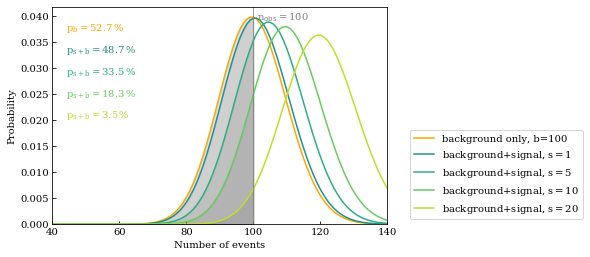

In [46]:
n_obs = 100
fig = plt.figure('Poisson distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(n_array,Po(n_array,background),'orange',
         label=r'background only, b={0}'.format(background))
ax1.text(0.04,0.9, r'$p_{{b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,Po(n_array,background))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'orange')
for i in range(np.size(signal)):
    sb = background+signal[i]
    ax1.plot(n_array,Po(n_array,sb),
        color=color('viridis',np.size(signal),0.5,0.9)[i], 
        label=r'background+signal, $s={0}$'.format(signal[i]))
    ax1.fill_between(n_array,Po(n_array,sb),0, where = (n_array <= n_obs), color = 'grey', alpha = 0.2)
    ax1.text(0.04,0.8-i*0.1, r'$p_{{s+b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,Po(n_array,background+signal[i]))*100), 
             fontsize=10, ha='left', va='center', transform=ax1.transAxes,
            color=color('viridis',np.size(signal),0.5,0.9)[i])
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'Probability')
ax1.set_xlabel(r'Number of events')
ax1.tick_params(right=False,direction='in')
ax1.axvline(x=n_obs, color='grey', linewidth=0.8)
ax1.text(n_obs+1,Po(background,background),r'$n_{{\rm obs}}=${0}'.format(n_obs),ha='left', va='center', color='grey')
ax1.fill_between(n_array,Po(n_array,background),0, where = (n_array <= n_obs), color = 'grey', alpha = 0.2)
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.6,0))
plt.show( block=False )

In the second try we observe more events $n_{obs}=100$, now for all hypothesis the left handed p-values are significantly higher. 

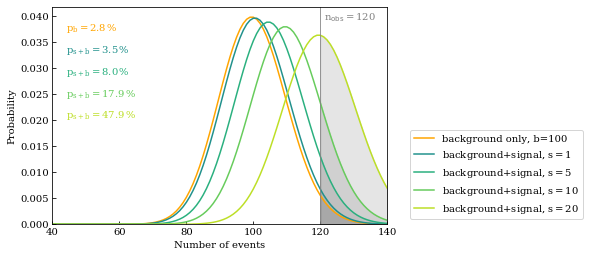

In [47]:
n_obs = 120
fig = plt.figure('Poisson distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(n_array,Po(n_array,background),'orange',
         label=r'background only, b={0}'.format(background))
ax1.text(0.04,0.9, r'$p_{{b}}={:.1f}\,\%$'.format(pval('right',n_obs,n_array,Po(n_array,background))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'orange')
for i in range(np.size(signal)):
    sb = background+signal[i]
    ax1.plot(n_array,Po(n_array,sb),
        color=color('viridis',np.size(signal),0.5,0.9)[i], 
        label=r'background+signal, $s={0}$'.format(signal[i]))
    ax1.fill_between(n_array,Po(n_array,sb),0, where = (n_array >= n_obs), color = 'grey', alpha = 0.2)
    ax1.text(0.04,0.8-i*0.1, r'$p_{{s+b}}={:.1f}\,\%$'.format(pval('right',n_obs,n_array,Po(n_array,background+signal[i]))*100), 
             fontsize=10, ha='left', va='center', transform=ax1.transAxes,
            color=color('viridis',np.size(signal),0.5,0.9)[i])
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'Probability')
ax1.set_xlabel(r'Number of events')
ax1.tick_params(right=False,direction='in')
ax1.axvline(x=n_obs, color='grey', linewidth=0.8)
ax1.text(n_obs+1,Po(background,background),r'$n_{{\rm obs}}=${0}'.format(n_obs),ha='left', va='center', color='grey')
ax1.fill_between(n_array,Po(n_array,background),0, where = (n_array >= n_obs), color = 'grey', alpha = 0.2)
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.6,0))
plt.show( block=False )

In this case we observe significantly more events than the estimated background. We now look at the right-tail p-value, i.e. a measure of the probability that we observe $n_{obs}$ or even more events with respect to the chosen model. Now the background only model p-value is significantly smaller than p-value for the s=20 hypothesis.

### Null hypothesis significance testing

We want to know if our observed number of events can be seen as a signal excess, i.e. if the meassured result is **statistically significant**. To do this, before performing the experiment, we first choose the null hypothesis (e.g. background-only model) and a threshold value for the p-value, called the significance level of the test, denoted by $\alpha$. The significance level is traditionally 0.05 or 0.01 and related to the confidence level CL by $\alpha = 1-CL$. The result is statistically significant, by the standards of the study, when $p_b \leq \alpha$. If the p-value is less than the chosen significance level, that suggests that the observed data is sufficiently inconsistent with the null hypothesis and that the null hypothesis may be rejected. However, that does not prove that the tested hypothesis is true; it rather means, that this test guarantees that the type I error rate (rejcetion of a true null hypothesis) is at most $\alpha$. 

In particle physics one usually converts the p-value into
an equivalent significance, $Z$, defined such that a Gaussian
distributed variable found $Z$ standard deviations above its
mean has an upper-tail probability equal to p. That is,
$$Z = \phi^{-1}(1 − p),$$
where $\phi^{-1}$ is the quantile (inverse of the cumulative distribution) of the standard Gaussian. For a signal process such as the Higgs boson, the particle physics community has tended to regard rejection of the background hypothesis with a significance of at least $Z = 5$ as an appropriate level to constitute a discovery. This corresponds to $p = 2.87 \times 10^{−7}$.

In [48]:
def sgnf(p):
    return stats.norm.ppf(p, loc=0, scale=1)

In [49]:
-sgnf(2.87*1e-7)

4.999765776842555

For a given significance level, we can put an lower/upper limit on the expected signal $s$ we use in our null-hypothesis (now a background+signal hypothesis) for which we would not reject it. If we get a lower or an upper limit on the signal depends on the way we calculate the p-value, i.e. lower limit for left-tail and upper limit for right-tail.

In [50]:
from scipy.optimize import minimize_scalar
def find_s_lim(direction,alpha,nobs,sample,*sampleargs):

    def minimizeme(s,direction,alpha,nobs,sample,*sampleargs):
        if direction is 'left':
            return np.abs(np.percentile(sample(s,*sampleargs,int(1e4)),alpha*100)-nobs)
        elif direction is 'right':
            return np.abs(nobs-np.percentile(sample(s,*sampleargs,int(1e4)),100-alpha*100))
        
    mini = minimize_scalar(minimizeme, args=(direction,alpha,nobs,sample,*sampleargs), bounds=(0, 100), method='bounded')
    
    if mini.success is True:
        s_lim = np.ceil(mini.x)
        test_sample = sample(s_lim,*sampleargs,int(1e4))
        nmin, nmax = np.min(test_sample), np.max(test_sample)
        relsample = stats.relfreq(test_sample, numbins=(nmax-nmin+1))[0]
        n_array = np.linspace(nmin,nmax,nmax-nmin+1)
        p_val_test = pval(direction,nobs,n_array,relsample)
        if p_val_test > alpha:
            if direction is 'left':
                s_lim= s_lim+1
            elif direction is 'right':
                s_lim = s_lim-1
            test_sample = sample(s_lim,*sampleargs,int(1e4))
            nmin, nmax = np.min(test_sample), np.max(test_sample)
            relsample = stats.relfreq(test_sample, numbins=(nmax-nmin+1))[0]
            n_array = np.linspace(nmin,nmax,nmax-nmin+1)
            p_val_test = pval(direction,nobs,n_array,relsample)
        if direction is 'left':
                print('your lower signal limit is')
        elif direction is 'right':
                print('your upper signal limit is')
    else:
        print('the limit search was not successful')
        
    
    return s_lim

In [541]:
find_s_lim('left',0.05,93,Po_sample,100)

your lower signal limit is


11.0

In [51]:
find_s_lim('right',0.05,123,Po_sample,100)

your upper signal limit is


5.0

We look at some example plots which make this more clear. In the first one we assume, that we meassured 93 events and we want to have a significance level of $\alpha = 5\%$. Our code snippet calculates that the lower limit on the signal for which we will not reject the background+signal hypothesis as a null hypothesis is $s=11$. If we look at the distribution for a hypothesis with an expected number of signals smaller then this value, we see that the p-value is larger then $\alpha$. 

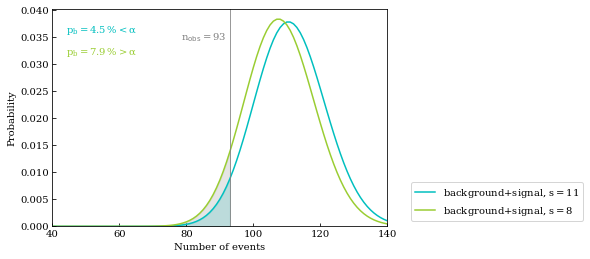

In [52]:
background = 100
n_obs = 93

fig = plt.figure('Poisson distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(n_array,Po(n_array,background+11),'c',
         label=r'background+signal, $s=11$')
ax1.plot(n_array,Po(n_array,8+background),
    color='yellowgreen',label=r'background+signal, $s=8$')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'Probability')
ax1.set_xlabel(r'Number of events')
ax1.tick_params(right=False,direction='in')
ax1.axvline(x=n_obs, color='grey', linewidth=0.8)
ax1.text(n_obs-1,0.035,r'$n_{{\rm obs}}=${0}'.format(n_obs),ha='right', va='center', color='grey')
ax1.fill_between(n_array,Po(n_array,background+11),0, where = (n_array <= n_obs), color = 'c', alpha = 0.2)
ax1.fill_between(n_array,Po(n_array,8+background),0, where = (n_array <= n_obs), color = 'grey', alpha = 0.2)
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.6,0))
ax1.text(0.04,0.9, r'$p_{{b}}={:.1f}\,\%<\alpha$'.format(pval('left',n_obs,n_array,Po(n_array,background+11))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'c')
ax1.text(0.04,0.8, r'$p_{{b}}={:.1f}\,\%>\alpha$'.format(pval('left',n_obs,n_array,Po(n_array,background+8))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'yellowgreen')
plt.show( block=False )

In the second one we assume, that we meassured 93 events and we want to have a significance level of $\alpha = 5\%$. Our code snippet calculates that the upper limit on the signal for which we will not reject the background+signal hypothesis as a null hypothesis is $s=5$. If we look at the distribution for a hypothesis with an expected number of signals greater then this value, we see that the p-value is larger then $\alpha$. 

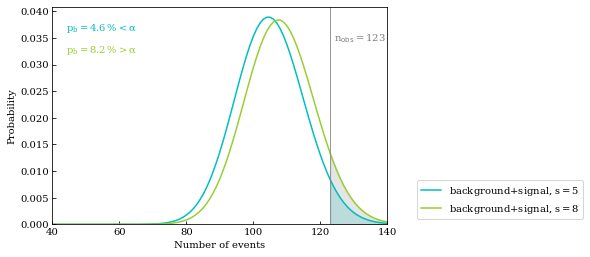

In [53]:
background = 100
n_obs = 123

fig = plt.figure('Poisson distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(n_array,Po(n_array,background+5),'c',
         label=r'background+signal, $s=5$')
ax1.plot(n_array,Po(n_array,8+background),
    color='yellowgreen',label=r'background+signal, $s=8$')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'Probability')
ax1.set_xlabel(r'Number of events')
ax1.tick_params(right=False,direction='in')
ax1.axvline(x=n_obs, color='grey', linewidth=0.8)
ax1.text(n_obs+1,0.035,r'$n_{{\rm obs}}=${0}'.format(n_obs),ha='left', va='center', color='grey')
ax1.fill_between(n_array,Po(n_array,background+5),0, where = (n_array >= n_obs), color = 'c', alpha = 0.2)
ax1.fill_between(n_array,Po(n_array,8+background),0, where = (n_array >= n_obs), color = 'grey', alpha = 0.2)
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.6,0))
ax1.text(0.04,0.9, r'$p_{{b}}={:.1f}\,\%<\alpha$'.format(pval('right',n_obs,n_array,Po(n_array,background+5))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'c')
ax1.text(0.04,0.8, r'$p_{{b}}={:.1f}\,\%>\alpha$'.format(pval('right',n_obs,n_array,Po(n_array,background+8))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'yellowgreen')
plt.show( block=False )

### Systematic uncertainty in the background

We will now assume, that we have some systematic uncertainty in the background which we can describe with a Gaussian distribution, so $b = \mu_b\pm \sigma_b$. Any other statistics could be also used. We then find the pdf $Q_{s+b}(n)$ of the background+signal model to be the <em>convolution</em> of the original pdf $Po_{s+b}(n)$ with the Gaussian distribution $$Ga(b,\mu_b,\sigma_b)=\frac{1}{\sqrt{2\pi}\sigma_b}e^{-(b-\mu_b)^2/2\sigma_b^2}.$$ 
So in total we have the new pdf:
$$Q_{s+b}(n)=\frac{1}{\sqrt{2\pi}\sigma_b}\int_0^\infty Po_{s+b}(n)e^{-(b-\mu_b)^2/2\sigma_b^2} db$$
For the numerical integration needed for the convolution we will set the maxium integration limit to $\mu_b+5\sigma_b$.

In [54]:
'''Analytical Approach'''
def Ga(x,param):
    mu=param[0]
    sigma=param[1]
    return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))


def Q_pdf(n,mub,sigmab,s):
    size = np.size(n)
    b_max = mub+5*sigmab
    b_array = np.linspace(0,b_max,b_max+1)
    
    if size == 1:
        integrand = []
        for b in b_array:
            integrand.append(Ga(b,[mub,sigmab])*Po(n,s+b))
        conv = np.trapz(integrand,b_array)
    else:
        conv = []
        for n_element in n:
            integrand = []
            for b in b_array:
                integrand.append(Ga(b,[mub,sigmab])*Po(n_element,s+b))
            conv.append(np.trapz(integrand,b_array))
    return conv

In a statistic approach we include the uncertainty in the background by drawing $b$ randomly from some distribution, while constructing the sample of events meassured. 

In [55]:
'''Statistics approach'''
def Q_pdf_sample(s,mub,sigmab,size):
    if size <= 1e5:
        background = np.random.normal(mub,sigmab,size)
    else:
        background = stats.norm.rvs(loc=mub, scale=sigmab, size=size)
    sample = []
    for b in background:
        mu = b+s
        sample.append(stats.poisson.rvs(mu, size=1)[0])
    return sample

We have a quick look at how an uncertainity in the background changes the pdf. In the first case we state that we measure a background of $b=95$ events, without any uncertainty. In the second case one of our background measurements might still read 95 events, however we know, that this is just one result in a Gaussian distributed background with $\mu_b= 100$ and $\sigma_b=5$. 

In [56]:
mu_b = 100
sigma_b = 5
background = 95
n_obs = 80
size = int(1e5)


sample = Q_pdf_sample(0,mu_b,sigma_b,size)
nmin, nmax = np.min(sample), np.max(sample)
relsample = stats.relfreq(sample, numbins=(nmax-nmin+1))[0]
n_array = np.linspace(nmin,nmax,nmax-nmin+1)
n_array2 = np.linspace(nmin,nmax-10,nmax-10-nmin+1)

C:\Users\einfa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


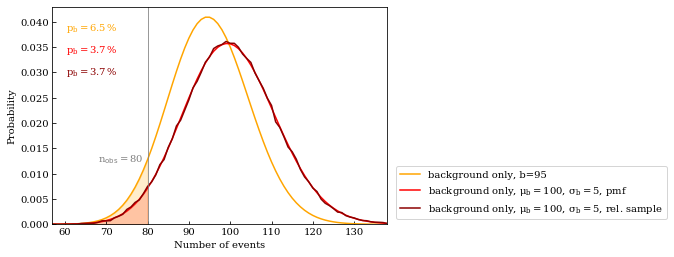

In [57]:
fig = plt.figure('Poisson distribution',
                      constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(n_array2,Po(n_array2,background),'orange',
         label=r'background only, b={0}'.format(background))
ax1.plot(n_array2,Q_pdf(n_array2,mu_b,sigma_b,0),'red',
         label=r'background only, $\mu_b={0},\,\sigma_b={1}$, pmf'.format(mu_b,sigma_b))
ax1.plot(n_array,relsample,'darkred',
         label=r'background only, $\mu_b={0},\,\sigma_b={1}$, rel. sample'.format(mu_b,sigma_b))
ax1.text(0.04,0.9, r'$p_{{b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array2,Po(n_array2,background))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'orange')
ax1.text(0.04,0.8, r'$p_{{b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,np.array(Q_pdf(n_array2,mu_b,sigma_b,0)))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'red')
ax1.text(0.04,0.7, r'$p_{{b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,relsample)*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'darkred')
ax1.set_xlim(nmin,nmax-10)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'Probability')
ax1.set_xlabel(r'Number of events')
ax1.tick_params(right=False,direction='in')
ax1.axvline(x=n_obs, color='grey', linewidth=0.8)
ax1.text(n_obs-1,Po(n_obs,background),r'$n_{{\rm obs}}=${0}'.format(n_obs),ha='right', va='center', color='grey')
ax1.fill_between(n_array,Q_pdf(n_array,mu_b,sigma_b,0),0, where = (n_array <= n_obs), color = 'red', alpha = 0.2)
ax1.fill_between(n_array,Po(n_array,background),0, where = (n_array <= n_obs), color = 'orange', alpha = 0.2)
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.85,0))
plt.show( block=False )

We see now, that for the case with the systematic uncertainty in the background the p-value is lower then for the fixed background case. If we set the significance level to $5\%$, we would reject the fixed background null-hypothesis, but not the background with uncertainty hypothesis.

It is also intereseting to see in what way an uncertainity in the background will change the upper and lower limit on the signal. We use the same values as in the section above, but use a Gaussian distributed background with $\mu_b= 100$ and $\sigma_b=5$. 

In [58]:
mu_b = 100
sigma_b = 5
find_s_lim('left',0.05,93,Q_pdf_sample,mu_b,sigma_b)

your lower signal limit is


13.0

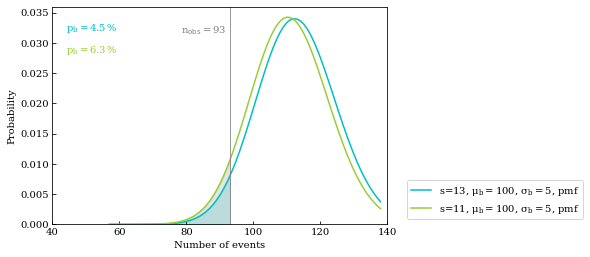

In [59]:
n_obs = 93

fig = plt.figure('Poisson distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(n_array2,Q_pdf(n_array2,mu_b,sigma_b,13),'c',
         label=r's=13, $\mu_b={0},\,\sigma_b={1}$, pmf'.format(mu_b,sigma_b))
ax1.plot(n_array2,Q_pdf(n_array2,mu_b,sigma_b,11),'yellowgreen',
         label=r's=11, $\mu_b={0},\,\sigma_b={1}$, pmf'.format(mu_b,sigma_b))
ax1.text(0.04,0.9, r'$p_{{b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,np.array(Q_pdf(n_array2,mu_b,sigma_b,13)))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'c')
ax1.text(0.04,0.8, r'$p_{{b}}={:.1f}\,\%$'.format(pval('left',n_obs,n_array,np.array(Q_pdf(n_array2,mu_b,sigma_b,11)))*100), 
         fontsize=10, ha='left', va='center', transform=ax1.transAxes,
         color = 'yellowgreen')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'Probability')
ax1.set_xlabel(r'Number of events')
ax1.tick_params(right=False,direction='in')
ax1.axvline(x=n_obs, color='grey', linewidth=0.8)
ax1.text(n_obs-1,0.032,r'$n_{{\rm obs}}=${0}'.format(n_obs),ha='right', va='center', color='grey')
ax1.fill_between(n_array2,Q_pdf(n_array2,mu_b,sigma_b,13),0, where = (n_array2 <= n_obs), color = 'c', alpha = 0.2)
ax1.fill_between(n_array2,Q_pdf(n_array2,mu_b,sigma_b,11),0, where = (n_array2 <= n_obs), color = 'grey', alpha = 0.2)
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.6,0))
plt.show( block=False )

The lower limit on the signal is now higher than in the previous section!

## The method of maximum likelihood

### ML estimators

Consider a random variable x distributed according to a pdf $f(x; \theta)$. Suppose
the functional form of $f(x; \theta)$ is known, but the value of at least one parameter
$\theta$ (or parameters $\boldsymbol{\theta}=(\theta_1,\dots,\theta_m)$ are not known. That is, $f(x; \theta)$ represents a
composite hypothesis for the pdf. The method of **maximum
likelihood** is a technique for estimating the values of the parameters given a finite sample of data. 

Suppose a measurement of the random variable $x$ has been
repeated n times, yielding the values $x_1,\dots,x_n$. 
Under the assumption of the hypothesis $f(x; \theta)$, including the value of $\theta$,
the probability for the first measurement to be in the interval $[x_1,x_1+dx_1]$ is $f(x_1; \theta)dx_1$. Since the measurements are all assumed to be independent, the
probability to have the first one in $[x_1,x_1+dx_1]$, the second in $[x_2,x_2+dx_2]$,
and so forth is given by
$$(\text{probability that } x_i \text{ in } [x_i,x_i+dx_i] \text{ for all }i)\,\,= \prod_{i=1}^n f(x_i; \theta)dx_i.$$
If the hypothesized pdf and parameter values are correct, one expects a high probability for the data that were actually measured. Conversely, a parameter value far away from the true value should yield a low probability for the measurements obtained. Since the $dx_i$ do not depend on the parameters, the same reasoning also applies to the following function $L$,
$$L(\theta) = \prod_{i=1}^n f(x_i; \theta) $$
called the **likelihood function**. Note that this is just the joint pdf for the $x_i$, although it is treated here as a function of the parameter $\theta$. The $x_i$, on the other hand, are treated as fixed (i.e. the experiment is over).

With this motivation one defines the maximum likelihood (ML) estimators for the parameters to be those which maximize the likelihood function. The estimators are are usually written with hats, $\widehat{\boldsymbol{\theta}} = (\hat{\theta_1},\dots,\hat{\theta_m})$, to distinguish
them from the true parameters $\theta_i$ whose exact values remain unknown.

### Example of ML estimators I

We suppose to have $n$ measurements of a random variable $x$ assumed to be distributed according to a Gaussian pdf of some $\mu$ and $\sigma^2$:
$$f(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2}.$$ 
For a fixed set of measurements $(x_1,\dots,x_n)$, the likelihood function is given by 
$$L(\mu,\sigma^2)=\prod_{i=1}^nf(x_i,\mu,\sigma^2)$$ 
and the **log-likelihood function** is
$$\log L(\mu,\sigma^2)=\sum_{i=1}^n\log f(x_i,\mu,\sigma^2) =\sum_{i=1}^n\left(\log\frac{1}{\sqrt{2\pi}}+\frac{1}{2}\log\frac{1}{\sigma^2}-\frac{(x_i-\mu)^2}{2\sigma^2}\right).$$ 

In this case we could find the ML estimators $\hat{\mu}$ and $\widehat{\sigma^2}$ analytically by setting the derivative of the above expression equal to zero. However, here we now randomly draw a sample from a Gaussian distribution, where we fix $\mu$ and $\sigma^2$ and then see if the ML method gives us a good result. 

In [60]:
mu = 0.2
sigma = 0.1 
size = 50
sample_ga = stats.norm.rvs(loc=mu, scale=sigma, size=size)

In [61]:
#log likelihood for any entered distribution
#distribution has to depend on two arguments, x and param
#return negative value so we can use minimize
def log_l(param,sample,distr):
    logl = 0
    for x in sample:
        logl += anp.log(distr(x,param))
    return -logl

In [62]:
from scipy.optimize import minimize
results = minimize(log_l,[1,1],args=(sample_ga,Ga)).x
mu_est = results[0]
sigma_est = results[1]
print('mu_est={:.3f}'.format(mu_est))
print('sigma_est={:.3f}'.format(np.abs(sigma_est)))

mu_est=0.225
sigma_est=0.096


C:\Users\einfa\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
C:\Users\einfa\anaconda3\lib\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


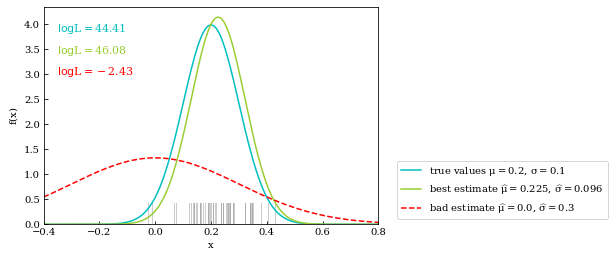

In [63]:
xmin,xmax = -0.4,0.8
x_array = np.linspace(xmin,xmax,200)
mu_bad = mu-0.2
sigma_bad = sigma+0.2

fig = plt.figure('Gaussian distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
for x_i in sample_ga:
    ax1.axvline(x=x_i, ymin=0, ymax=0.1, color='grey',alpha=0.4, linewidth=1)
ax1.plot(x_array,Ga(x_array,[mu,sigma]),'c',
         label=r'true values $\mu = {0:.1f},\,\sigma = {1:.1f}$'.format(mu,sigma))
ax1.text(0.04,0.9, r'$\log L={0:.2f}$'.format(-log_l([mu,sigma],sample_ga,Ga)), 
         fontsize=11, ha='left', va='center', transform=ax1.transAxes,
         color = 'c')
ax1.plot(x_array,Ga(x_array,[mu_est,sigma_est]),'yellowgreen',
         label=r'best estimate $\widehat{{\mu}} = {0:.3f},\,\widehat{{\sigma}} = {1:.3f}$'.format(mu_est,sigma_est))
ax1.text(0.04,0.8, r'$\log L={0:.2f}$'.format(-log_l([mu_est,sigma_est],sample_ga,Ga)), 
         fontsize=11, ha='left', va='center', transform=ax1.transAxes,
         color = 'yellowgreen')
ax1.plot(x_array,Ga(x_array,[mu_bad,sigma_bad]),'red',linestyle='--',
         label=r'bad estimate $\widehat{{\mu}} = {0:.1f},\,\widehat{{\sigma}} = {1:.1f}$'.format(mu_bad,sigma_bad))
ax1.text(0.04,0.7, r'$\log L={0:.2f}$'.format(-log_l([mu_bad,sigma_bad],sample_ga, Ga)), 
         fontsize=11, ha='left', va='center', transform=ax1.transAxes,
         color = 'red')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'$f(x)$')
ax1.set_xlabel(r'$x$')
ax1.tick_params(right=False,direction='in')
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.7,0))
plt.show( block=False )

In the plot above we can see that the best estimate from the maximum likelihood method does not have to be the true value (i.e. the blue and green line differ). This is due to statistical fluctuations in the sample. For a better estimate we see that the log-likelihood value ist greater than the one for a bad estimate, such as the red line.

### Example of ML estimators II

Suppose the proper decay time for some unstable particles (e.g. muons) have been measured for $n$ decays, yielding values $t_i,\dots,t_n$ and suppose one chooses as a hypothesis for the distribution of $t$ an exponential pdf with mean deacy time $\tau$ (this is actually the case for muon decays):
$$f(t,\tau)=\frac{1}{\tau}e^{-t/\tau}.$$
We want to estimate the value of the parameter $\tau$ by maximizing the log-likelihood function
$$\log L(\tau)=\sum_{i=1}^n\log f(t_i,\tau)=\sum_{i=1}^n\left(\log\frac{1}{\tau}-\frac{t_i}{\tau}\right).$$
In this case we could again find the maximum analytically (see Cowan 6.2), however, in this notebook we focus on the numerical way. 

As an example consider a sample of 50 Monte Carlo generated decay times $t$ distributed according to an exponential pdf using a true lifteime $\tau=2.0$. The Monte Carlo generated times are displayed as grey bars in the plot below.

In [64]:
def Ex(t,tau):
    return (1/tau)*anp.exp(-(t/tau))

In [65]:
tau = 2 
size = 50
sample_ex = np.random.exponential(tau, size)

In [66]:
from scipy.optimize import minimize
results = minimize(log_l,1,args=(sample_ex,Ex))
tau_est = results.x[0]
print('tau_est={:.3f}'.format(tau_est))

tau_est=1.643


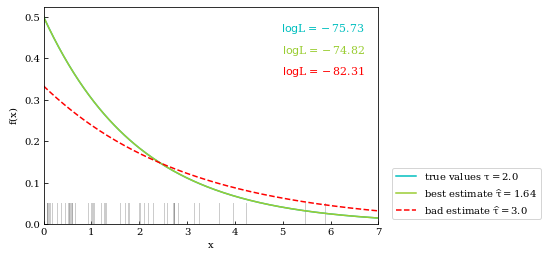

In [67]:
xmin,xmax = 0,7
x_array = np.linspace(xmin,xmax,200)
tau_bad = tau+1

fig = plt.figure('Exponential distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
for x_i in sample_ex:
    ax1.axvline(x=x_i, ymin=0, ymax=0.1, color='grey',alpha=0.4, linewidth=1)
ax1.plot(x_array,Ex(x_array,tau),'c',
         label=r'true values $\tau = {0:.1f}$'.format(tau))
ax1.text(0.96,0.9, r'$\log L={0:.2f}$'.format(-log_l(tau,sample_ex,Ex)), 
         fontsize=11, ha='right', va='center', transform=ax1.transAxes,
         color = 'c')
ax1.plot(x_array,Ex(x_array,tau),'yellowgreen',
         label=r'best estimate $\widehat{{\tau}} = {0:.2f}$'.format(tau_est))
ax1.text(0.96,0.8, r'$\log L={0:.2f}$'.format(-log_l(tau_est,sample_ex,Ex)), 
         fontsize=11, ha='right', va='center', transform=ax1.transAxes,
         color = 'yellowgreen')
ax1.plot(x_array,Ex(x_array,tau_bad),'red',linestyle='--',
         label=r'bad estimate $\widehat{{\tau}} = {0:.1f}$'.format(tau_bad))
ax1.text(0.96,0.7, r'$\log L={0:.2f}$'.format(-log_l(tau_bad,sample_ex, Ex)), 
         fontsize=11, ha='right', va='center', transform=ax1.transAxes,
         color = 'red')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'$f(x)$')
ax1.set_xlabel(r'$x$')
ax1.tick_params(right=False,direction='in')
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.5,0))
plt.show( block=False )

As in the Gaussian case we see that the ML estimators is not identical to the true value of the decay time, however it is very clos and also the likelihoods are close together. Again the bad estimator gives a lower log L value. 

### Variance of ML estimators

Given a set of $n$ measurements of a random variable $x$ and a hypothesis for the pdf $f(x,\theta)$ we have seen how to estimate its parameters. The next task is to
give some measure of the statistical uncertainty of the estimates. That is, if we
repeated the entire experiment a large number of times (with $n$ measurements each time) each experiment would give different estimated values for the parameters.
How widely spread will they be? One way of summarizing this is with the variance (or standard deviation) of the estimator. For certain cases one can compute the variances of the ML estimators analytically. However, for cases that are too difficult to solve analytically, the distribution of the ML estimates can be investigated with the Monte Carlo method. To do this one simulates a large number of experiments, computes the ML estimates each time
and has a look at how the resulting values are distributed. For the 'true' parameter in the Monte Carlo program the estimated value from the single real experiment can
be used.

As an example we consider again the case of the mean lifetime as in the example above. For a true lifetime of $\tau=2.0$, a sample of $n=50$ measurements gave the ML estimate $\widehat{\tau}=2.18$ (this value changes if you rerun the notebook!). We now simulate 1000 further experiments with 50 simulated measurements each, using as the true value the ML estimate $\tau=2.18$.

In [68]:
tau_est_sample = []
MC_number = 1000
counter = 0
tau_s = tau_est 
size = 50
while counter < MC_number:
    sample = np.random.exponential(tau_s, size)
    results = minimize(log_l,1,args=(sample,Ex))
    tau_est_s = results.x[0]
    tau_est_sample.append(tau_est_s)
    counter += 1

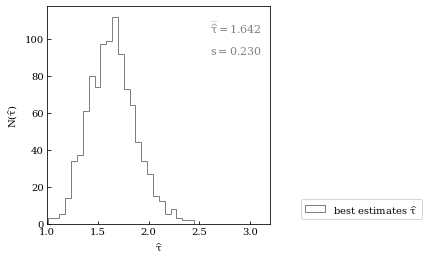

In [69]:
tau_est_mean = np.mean(tau_est_sample)
tau_est_std = np.std(tau_est_sample)

fig = plt.figure('Variance of mean lifetime estimator',
                  constrained_layout=False, figsize=(4,4))
ax1 = fig.add_subplot()
ax1.hist(tau_est_sample,25,histtype='step', color='grey',
         label=r'best estimates $\widehat{\tau}$')
ax1.text(0.96,0.9, r'$\widebar{{\widehat{{\tau}}}}={0:.3f}$'.format(tau_est_mean), 
         fontsize=11, ha='right', va='center', transform=ax1.transAxes,
         color = 'grey')
ax1.text(0.96,0.8, r'$s={0:.3f}$'.format(tau_est_std), 
         fontsize=11, ha='right', va='center', transform=ax1.transAxes,
         color = 'grey')
ax1.set_xlim(1,3.2)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'$N(\widehat{\tau})$')
ax1.set_xlabel(r'$\widehat{\tau}$')
ax1.tick_params(right=False,direction='in')
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.7,0))
plt.show( block=False )

Note that this distribution is approximately Gaussian in shape. This is a gerneral property of ML estimators for the large sample limit, known as **asymptotic normality**. With these estimates one would report a real measurement as $$\widehat{\tau}=2.18\pm 0.31$$. 

#### The RCF bound

Already in this very simple example above, we see that the Monte Carlo method to determine the standard deviation involves a significant amount of work. If the computation time would be too extensice, one typically uses the **Rao-Cramér-Frechet (RCF) inequality**, which gives a lower bound on an estimator's variance. In pratice one often assumes that the estimator is efficienty and has zero bias (for the definition of these terms check Cowan). Then for the case of more than one parameter, $\boldsymbol{\theta}=(\theta_1,\dots,\theta_m)$, the corresponding formula for the inverse of the covariance matirx of their estimators $V_{ij}=\text{cov}[\hat{\theta}_i,\hat{\theta}_j]$ is 
$$(V^{-1})_{ij}=E\left[-\frac{\partial^2\log L}{\partial\theta_i\partial\theta_j}\right].$$
The inverse ot the RCF bound for the covariance matrix is also called the **Fisher information matrix** and is poroportional to the number of measurements in the sample, $n$. However, analytically calculating the expectation value of the second derivative of the log-likelihood function can be impractical. For a sufficiently large data sample, once can thus estimate $V^{-1}$ by evaluating the second derivative with the measured data and the ML estimates $\boldsymbol{\widehat{\theta}}$:
$$(\widehat{V^{-1}})_{ij}=-\left.\frac{\partial^2\log L}{\partial\theta_i\partial\theta_j}\right|_{\boldsymbol{\theta}=\boldsymbol{\widehat{\theta}}}$$
For a single parameter $\theta$ this reduces to 
$$(\widehat{\sigma^2})_{\hat{\theta}}=-\left.\left( 1 \middle/ \frac{\partial^2\log L} {\partial\theta^2} \right)\right|_{\theta=\hat{\theta}}.$$

### Example of ML with two parameters

We will look at another example for the maximum likelihood method and the RCF bound as a measure of variance. Consider a particle reaction where each scattering event is chracterized by a vertain scattering angle $\theta$ ($x=\cos\theta$). Suppose a given theory predicts the normalized angular distribution within a given range $x_{\rm min}\leq x \leq x_{\rm max}$ 
$$f(x;\alpha,\beta)=\frac{1+\alpha x+\beta x^2}{2+2\beta/3}.$$ 

We generate some mock data from a Monte Carlo experiment with $\alpha=0.5$, $\beta = 0.5$, $x_{\rm min} = -0.95$ and $x_{\rm max}=0.95$:

In [70]:
#the pdf for the scattering process
def Sc(x,param):
    alpha = param[0] 
    beta = param[1]
    return (1+alpha*x+beta*x**2)/((xmax-xmin)+0.5*alpha*(xmax**2-xmin**2)+beta*(1/3)*(xmax**3-xmin**3))

#some simple MC reject algorithm to draw a sample from the above pdf
def sample_scattering(param,xmin,xmax,size):
    fxmax = Sc(xmax,param)                  #here the max value for the "square", since the pdf is s.i. for x>0
    count = 0
    sample_out = []
    while count < size:
        r1 = np.random.uniform(xmin,xmax,1)[0]
        r2 = np.random.uniform(0,fxmax,1)[0]
        fr1 = Sc(r1,param)
        if fr1 >= r2:
            sample_out.append(r1)
            count += 1
    return sample_out

In [71]:
alpha = 0.5
beta = 0.5
size = 2000
xmin = -0.95
xmax = 0.95

sample_sc = sample_scattering([alpha,beta],xmin,xmax,size)

In [72]:
from scipy.optimize import minimize
results = minimize(log_l,[0,0],args=(sample_sc,Sc))
alpha_est = results.x[0]
beta_est = results.x[1]
print('alpha_est={:.3f}'.format(alpha_est))
print('beta_est={:.3f}'.format(beta_est))

alpha_est=0.463
beta_est=0.478


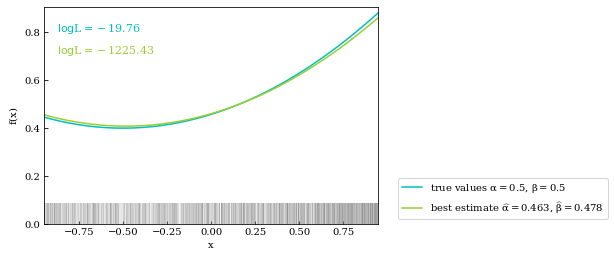

In [73]:
x_array = np.linspace(xmin,xmax,200)

fig = plt.figure('Exponential distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
for x_i in sample_sc:
    ax1.axvline(x=x_i, ymin=0, ymax=0.1, color='grey',alpha=0.1, linewidth=1)
ax1.plot(x_array,Sc(x_array,[alpha,beta]),'c',
         label=r'true values $\alpha = {0:.1f},\,\beta = {1:.1f}$'.format(alpha,beta))
ax1.text(0.04,0.9, r'$\log L={0:.2f}$'.format(-log_l([alpha,beta],sample_ga,Ga)), 
         fontsize=11, ha='left', va='center', transform=ax1.transAxes,
         color = 'c')
ax1.plot(x_array,Sc(x_array,[alpha_est,beta_est]),'yellowgreen',
         label=r'best estimate $\widehat{{\alpha}} = {0:.3f},\,\widehat{{\beta}} = {1:.3f}$'.format(alpha_est,beta_est))
ax1.text(0.04,0.8, r'$\log L={0:.2f}$'.format(-log_l([alpha_est,beta_est],sample_sc,Sc)), 
         fontsize=11, ha='left', va='center', transform=ax1.transAxes,
         color = 'yellowgreen')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(bottom=0)
ax1.set_ylabel(r'$f(x)$')
ax1.set_xlabel(r'$x$')
ax1.tick_params(right=False,direction='in')
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.7,0))
plt.show( block=False )

Again the ML estimates are not excatly the true values but very close. Note that the log L value for the true values is significantly lower then for the best estimates. We now calculate the covariance matrix numerically using the RCF bound, i.e. finding the second derivative at $\hat{\theta}$. We do this using the autograd package and taking the Jacobian of the gradient. 

In [74]:
from autograd import elementwise_grad as egrad
from autograd import jacobian

In [75]:
def specific_log_l(param):
    return -log_l(param,sample_sc,Sc)

param_est = np.array([alpha_est,beta_est])
V_inv = jacobian(egrad(specific_log_l))  # returns a function
cov = -np.linalg.inv(V_inv(param_est))
print(cov)

[[0.00263702 0.00220914]
 [0.00220914 0.01165771]]


In [76]:
print(np.sqrt(cov[0,0]))
print(np.sqrt(cov[1,1]))

0.05135195009681758
0.10797086615587503


In this way we find the following statistical measure for an experiment, where the stat. errors in the parameters are the squareroots of the variance:
$$\widehat{\alpha}=0.435\pm 0.050$$
$$\widehat{\beta}=0.39\pm 0.12$$
$$\widehat{\rm cov}[\widehat{\alpha},\widehat{\beta}]=0.0020$$

### Extendended maximum likelihood

Often the number of observations $n$ in the sample is itself not a fixed number but a Poisson random variable with mean value $\nu$. Then the results of the experiment can be defined as the number $n$ and the values $x_1,\dots,x_n$. The likelihood function is then the product of the Poisson probability to find $n$ and the usual likelihood function:
$$L(\nu,\boldsymbol{\theta})=\frac{\nu^n}{n!}e^{-\nu}\prod_{i=1}^n f(x_i; \theta)=\frac{e^{-\nu}}{n!}\prod_{i=1}^n \nu\,f(x_i; \theta)$$
This is called the **extended likelihood function**. If $\nu$ is given as a function of $\theta$ the extended log-likelihood function is
$$
\begin{align}
\log L(\boldsymbol{\theta})&= n\log\nu(\boldsymbol{\theta})-\nu(\boldsymbol{\theta})+\sum_{i=1}^n\log f(x_i,\boldsymbol{\theta}) \\
&=-\nu(\boldsymbol{\theta})+\sum_{i=1}^n\log(\nu(\boldsymbol{\theta})f(x_i,\boldsymbol{\theta})),
\end{align}
$$
where additive terms not depending on the parameters have been dropped. By including the Poisson term, the resulting estimators $\boldsymbol{\widehat{\theta}}$ exploit the information from $n$ as
well as from the variable $\boldsymbol{x}$. This leads in general to smaller variances for $\boldsymbol{\widehat{\theta}}$ than
in the case where only the $x$ values are used.

## Likelihood ratio as a test statistic

We can now combine the two topics we have seen above, by using a ratio of likelihood functions as a test statistic. Assume that we have an model/hypothesis, which depends on some parameters $\boldsymbol{\mu}$ and some nuissance parameters $\boldsymbol{\theta}$. We consider the **profile likelihood ratio**
$$\lambda(\boldsymbol{\mu},\boldsymbol{\theta})=\frac{L(\boldsymbol{\mu},\boldsymbol{\hat{\hat{\theta}}})}{L(\boldsymbol{\hat{\mu}},\boldsymbol{\hat{\theta}})}.$$

The numerator of this ratio is the **profile likelihood function** and the quantity $\small\boldsymbol{\hat{\hat{\theta}}}$ denotes the value of $\boldsymbol{\theta}$ which maximizes $L$ for a specified $\boldsymbol{\mu}$, i.e. it is the conditional ML estimator of $\boldsymbol{\theta}$ and thus a function of $\boldsymbol{\mu}$. The denominator is the maximized (unconditional likelihood function), i.e. $\boldsymbol{\hat{\mu}}$ and $\boldsymbol{\hat{\theta}}$ are their respective ML estimators. 

From the definition of $\lambda(\boldsymbol{\mu})$, one can see that $0\leq\lambda\leq 1$, with $\lambda$ near 1 implying good agreement between the data and the hypothesized value of $\boldsymbol{\mu}$. Equivalently it is convenient to  use the statistic
$$t(\boldsymbol{\mu})=-2\log \lambda(\boldsymbol{\mu})$$
as the basis of a statistical test. Higher values of $t_\mu$ thus correspond to increasing incompatibility between the data and $\boldsymbol{\mu}$. 

One can then define a test of hypothesized value of $\boldsymbol{\mu}$ by using the statistic $t(\boldsymbol{\mu})$ directly as measure of discrepancy between the data and the hypothesis, with higher values of $t(\boldsymbol{\mu})$ corresponding to increasing disagreement. Under random fluctuations in the data, the quantity $t_\mu$ is expected to follow a $\chi^2$ 
distribution with number of degrees of freedom $n$ equal to the number of parameters $\boldsymbol{\mu}$. One
can therefore exclude a hypothetical set of parameters $\boldsymbol{\mu}$ at confidence level $1 − p$ if
$$1 − \text{CDF}_{\chi^2}(n, t(\boldsymbol{\mu})) < p\,,\,\text{i.e}$$
$$\text{CDF}_{\chi^2}(n, t(\boldsymbol{\mu})) > 1-p\,,$$
where $\text{CDF}_{\chi^2}(n, x)$ denotes the cumulative distribution function for the $\chi^2$ distribution with $n$  degrees of freedom.

### Example I

We will start with a simple example, where we use again the lifetime of some decaying particle described by an exponential distribution. To do this we use the sample of 50 measurements of $t$ generated above for a true value $\tau=2.0$. In this case we have no nuissance parameters and we already found the ML for $\tau$ and thus know the denominator of $\lambda(\mu=\tau)$.

In [5]:
# this test statistic is now specifically defined for the exponential case 
# and can not be used in a general case like the log L function above! 
# since there are no nuissace parameters, we do not need to do any maximization for the nominator
def lambda_mu_ex(tau,sample,tauest):
    nom = 1
    denom = 1
    for t in sample:
        nom *= Ex(t,tau)
        denom *= Ex(t,tauest)
    return nom/denom

def test_stat_ex(tau,sample,tauest):
    return -2*np.log(lambda_mu_ex(tau,sample,tauest))

3.841458820694124


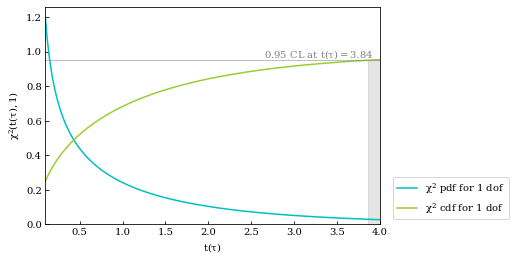

In [9]:
test_array = np.linspace(0.1,4.5,200)

p_val = 0.05
test_excl = stats.chi2.ppf(1-p_val,1)
print(test_excl)

fig = plt.figure('Test statistic distribution',
                  constrained_layout=False, figsize=(6,4))
ax1 = fig.add_subplot()
ax1.plot(test_array,stats.chi2.pdf(test_array,1),'c', label=r'$\chi^2$ pdf for 1 dof')
ax1.plot(test_array,stats.chi2.cdf(test_array,1),'yellowgreen', label=r'$\chi^2$ cdf for 1 dof')
ax1.set_ylim(bottom=0)
ax1.set_xlim(0.1,4)
ax1.set_ylabel(r'$\chi^2(t(\tau),1)$')
ax1.set_xlabel(r'$t(\tau)$')
ax1.tick_params(right=False,direction='in')
ax1.legend(loc = 'lower right', bbox_to_anchor= (1.4,0))
ax1.fill_between(test_array,stats.chi2.cdf(test_array,1),0, where = (test_array >= test_excl), color = 'grey', alpha = 0.2)
ax1.axhline(0.95, linewidth=0.5, color='grey')
ax1.text(2.65,0.97,r'0.95 CL at $t(\tau)={:.2f}$'.format(test_excl), color='grey')
plt.show( block=False )

We see, that the one achieves $\text{CDF}_{\chi^2}(n, x)>0.95$, i.e. a $95\%$ confidence intervall for values of $t(\tau)\geq 3.84$.

In [87]:
tau_array = np.linspace(0.9,3.1,200)
test_stat_array = test_stat_ex(tau_array,sample_ex,tau_est)
chi_array_2 = stats.chi2.pdf(test_stat_array,1)
up_lim = tau_array[np.argpartition(np.abs(test_stat_array-test_excl), 0)[0]]
low_lim = tau_array[np.argpartition(np.abs(test_stat_array-test_excl), 2)[2]]

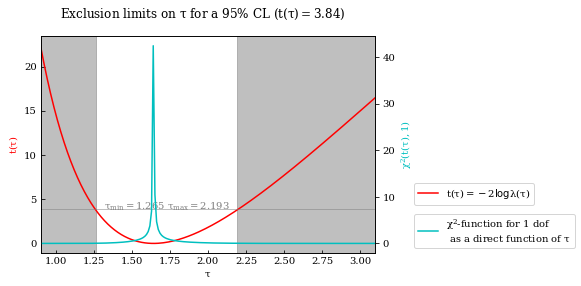

In [88]:
fig = plt.figure('Test statistic distribution',
                  constrained_layout=False, figsize=(6,4))
fig.suptitle(r'Exclusion limits on $\tau$ for a 95% CL ($t(\tau)={:.3}$)'.format(test_excl))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.plot(tau_array,test_stat_array,'red',label=r'$t(\tau)=-2\log\lambda(\tau)$')
ax2.plot(tau_array,chi_array_2,'c', label=r'$\chi^2$-function for 1 dof''\n as a direct '
        r'function of $\tau$' )
ax1.set_xlim(0.9,3.1)
ax1.set_ylabel(r'$t(\tau)$', color='red')
ax2.set_ylabel(r'$\chi^2(t(\tau),1)$',color='c')
ax1.set_xlabel(r'$\tau$')
ax1.tick_params(right=False,direction='in')
ax1.axhline(test_excl, linewidth=0.5, color='grey')
ax1.axvspan(0, low_lim, alpha=0.5, color='grey')
ax1.axvspan(up_lim,4, alpha=0.5, color='grey')
ax1.legend(loc = 'lower left', bbox_to_anchor= (1.1,0.2))
ax2.legend(loc = 'lower left', bbox_to_anchor= (1.1,0))
ax1.text(low_lim+0.05,test_excl,r'$\tau_{{min}}={:.4}$'.format(low_lim),ha='left', color='grey')
ax1.text(up_lim-0.05,test_excl,r'$\tau_{{max}}={:.4}$'.format(up_lim), ha='right', color='grey')
plt.show( block=False )

The test statistic $t(\tau)$ is not strictly increasing or decreasing and thus gives the exclusion value $t=3.84$ for two different values of $\tau$. In this way we get an upper and a lower limit for the decay time. Also note, that these are not equidistant from the best estimate value $\hat{\tau}$

### Example II a)

As a second example we will use again the Gaussian distributed sample with $\mu$ and $\sigma$ as parameters. In the first try we will set limits only on $\mu$ and leave $\sigma$ as a nuissance parameter.

In [89]:
# this test statistic is now specifically defined for the gaussian case 
# and can not be used in a general case like the log L function above! 
def Ga2(mu,sigma,x):
    return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

def log_l_Ga(sigma,mu,sample):
    logl = 0
    for x in sample:
        logl += np.log(Ga2(mu,sigma,x))
    return -logl

def lambda_mu_Ga(mu,sample,denom):
    nom = 1
    sigma_const = minimize(log_l_Ga,1,args=(mu,sample)) #constrained ML for sigma for a certain mu
    for y in sample:
        nom *= Ga2(mu,sigma_const.x,y)
    return nom/denom

def test_stat_Ga(mu,sample,paramest):
    return -2*np.log(lambda_mu_Ga(mu,sample,paramest))

In [93]:
param_est = [mu_est,sigma_est]
denom = 1
for x in sample_ga:
    denom *= Ga2(param_est[0],param_est[1],x)
mu_array = np.linspace(0.18,0.28,100)
test_array = []
for mus in mu_array:
    test_array.append(test_stat_Ga(mus,sample_ga,denom)[0])

C:\Users\einfa\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\einfa\anaconda3\lib\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in subtract
  df = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\einfa\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\einfa\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\einfa\anaconda3\lib\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in subtract
  df = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\einfa\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\einfa\anaconda3\lib\site-packages\scipy\optimize\optimize

In [97]:
chi_array=stats.chi2.pdf(test_array,1)
up_lim = mu_array[np.argpartition(np.abs(test_array-test_excl), 1)[1]]
low_lim = mu_array[np.argpartition(np.abs(test_array-test_excl), 0)[0]]

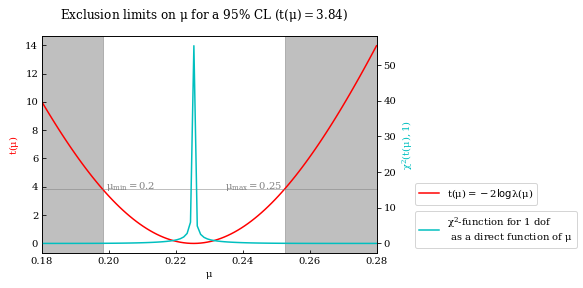

In [99]:
fig = plt.figure('Test statistic distribution',
                  constrained_layout=False, figsize=(6,4))
fig.suptitle(r'Exclusion limits on $\mu$ for a 95% CL ($t(\mu)={:.3}$)'.format(test_excl))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.plot(mu_array,test_array,'red',label=r'$t(\mu)=-2\log\lambda(\mu)$')
ax2.plot(mu_array,chi_array,'c', label=r'$\chi^2$-function for 1 dof''\n as a direct '
        r'function of $\mu$' )
ax1.set_xlim(0.18,0.28)
ax1.set_ylabel(r'$t(\mu)$', color='red')
ax2.set_ylabel(r'$\chi^2(t(\mu),1)$',color='c')
ax1.set_xlabel(r'$\mu$')
ax1.tick_params(right=False,direction='in')
ax1.axhline(test_excl, linewidth=0.5, color='grey')
ax1.axvspan(0.15, low_lim, alpha=0.5, color='grey')
ax1.axvspan(up_lim,0.28, alpha=0.5, color='grey')
ax1.legend(loc = 'lower left', bbox_to_anchor= (1.1,0.2))
ax2.legend(loc = 'lower left', bbox_to_anchor= (1.1,0))
ax1.text(low_lim+0.001,test_excl,r'$\mu_{{min}}={:.2}$'.format(low_lim),ha='left', color='grey')
ax1.text(up_lim-0.001,test_excl,r'$\mu_{{max}}={:.2}$'.format(up_lim), ha='right', color='grey')
plt.show( block=False )

### Example II b)

Now we also set limits on $\sigma$ and not leave it as a nuissance parameter!

In [100]:
# this test statistic is now specifically defined for the gaussian case 
# and can not be used in a general case like the log L function above! 
def lambda_mu_Ga2(mu,sigma,sample,paramest):
    nom = 1
    denom = 1
    for x in sample:
        nom *= Ga2(mu,sigma,x)
        denom *= Ga2(paramest[0],paramest[1],x)
    return nom/denom

def test_stat_Ga2(mu,sigma,sample,paramest):
    return -2*np.log(lambda_mu_Ga2(mu,sigma,sample,paramest))

In [123]:
from mpl_toolkits.mplot3d import Axes3D  

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

p_val = 0.05
test_excl = stats.chi2.ppf(1-p_val,2) #here 2, since we have two free parameters!

# Make data.
mu_array = np.linspace(0.18,0.28,500)
sigma_array = np.linspace(0.06,0.14,500)
mu_mesh, sigma_mesh = np.meshgrid(mu_array, sigma_array)
test_array = test_stat_Ga2(mu_mesh,sigma_mesh,sample_ga,param_est)
plane = 0*mu_mesh+test_excl

In [141]:
#find intersection of surfaces
sigmas = []
for i in range(500):
    sigmas.append(sigma_array[np.argpartition(np.abs(test_array[:,i]-plane[:,i]), 0)[0]])
sigmas = np.array(sigmas)
idx1 = np.where(sigmas>0.10)[0][55:-101]
idx2 = np.where(sigmas<0.10)[0]
sigmas1 = sigmas[idx1]
sigmas2 = sigmas[idx2]
z1 = test_excl*np.ones(np.shape(sigmas1))
z2 = test_excl*np.ones(np.shape(sigmas2))

C:\Users\einfa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\einfa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  """


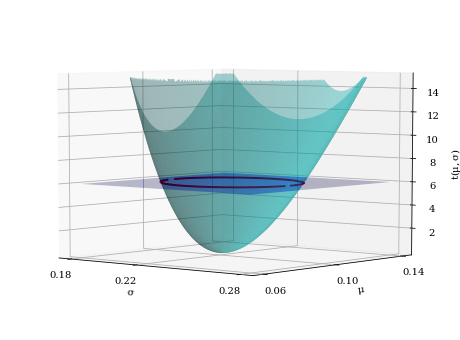

In [142]:
#this one is a slow cell, do not rerun if not necessary
test_array[test_array>15] = np.nan
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(mu_mesh,sigma_mesh, test_array, color='c', rstride=1, cstride=1, alpha=0.4)
ax.plot_surface(mu_mesh,sigma_mesh, plane, color='blue',rstride=1, cstride=2, alpha=0.25,)
ax.plot(mu_array[idx1],sigmas1,z1, color='red',linewidth=2)
ax.plot(mu_array[idx2],sigmas2,z2, color='red',linewidth=2)
ax.set_xticks([0.18,0.22, 0.28])
ax.set_yticks([0.06, 0.1, 0.14])
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'$t(\mu,\sigma)$')
ax.view_init(5, -50)

The available parameter space for a given confidence level is now described by an area in the $\sigma$-$\mu$-plane:

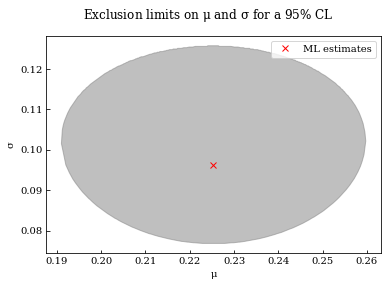

In [143]:
mus1 = mu_array[idx1]
mus2 = mu_array[idx2]

fig = plt.figure('Test statistic distribution',
                  constrained_layout=False, figsize=(6,4))
fig.suptitle(r'Exclusion limits on $\mu$ and $\sigma$ for a 95% CL')
ax1 = fig.add_subplot()
ax1.fill(
    np.append(mus1, mus2[::-1]),
    np.append(sigmas1, sigmas2[::-1]),alpha=0.5, color='grey'
)
ax1.set_ylabel(r'$\sigma$')
ax1.plot(param_est[0],param_est[1], marker = 'x', color='red', linewidth=0, label='ML estimates')
ax1.set_xlabel(r'$\mu$')
ax1.tick_params(right=False,direction='in')
ax1.legend()
plt.show( block=False )

Besides intersecting two surfaces, another way in which this area in the two-parameter space can be evaluated is by generating an array of values for $\sigma$ and then for each sigma finding the limits of $\mu$. Let's see if this results in the same area:

In [148]:
mu_array = np.linspace(0.14,0.26,200)
sigma_array = np.linspace(0.06,0.14,200)
p_val = 0.01
test_excl99 = stats.chi2.ppf(1-p_val,2)

In [149]:
#this is a slow cell, do not run again if not necessary
mu_low = np.zeros(200)
mu_up = np.zeros(200)
mu_low99 = np.zeros(200)
mu_up99 = np.zeros(200)
for i in range(np.shape(sigma_array)[0]):
    test_array = []
    for mu in mu_array:
        test_stat = test_stat_Ga2(mu,sigma_array[i],sample_ga,param_est)
        test_array.append(test_stat_Ga2(mu,sigma_array[i],sample_ga,param_est))
    low_lim = mu_array[np.argpartition(np.abs(test_array-test_excl), 0)[0]]
    up_lim = mu_array[np.argpartition(np.abs(test_array-test_excl), 1)[1]]
    low_lim99 = mu_array[np.argpartition(np.abs(test_array-test_excl99), 0)[0]]
    up_lim99 = mu_array[np.argpartition(np.abs(test_array-test_excl99), 1)[1]]
    if low_lim > up_lim:
        up = low_lim
        low = up_lim
    else:
        up = up_lim
        low = low_lim
    if low_lim99 > up_lim99:
        up99 = low_lim99
        low99 = up_lim99
    else:
        up99 = up_lim99
        low99 = low_lim99
    mu_low[i] = low
    mu_up[i] = up
    mu_low99[i] = low99
    mu_up99[i] = up99

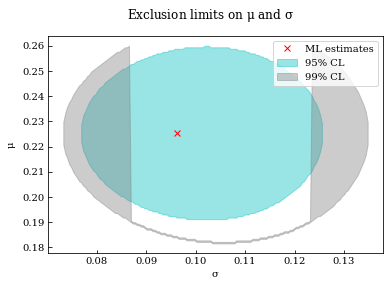

In [151]:
idx = np.where(mu_low!=mu_low[0])
idx99 = np.where(mu_up99!=mu_up99[0])

fig = plt.figure('Test statistic distribution',
                  constrained_layout=False, figsize=(6,4))
fig.suptitle(r'Exclusion limits on $\mu$ and $\sigma$')
ax1 = fig.add_subplot()
ax1.fill_between(sigma_array[idx],mu_low[idx],mu_up[idx],alpha=0.4, color='c', label='95% CL')
ax1.fill_between(sigma_array[idx99],mu_low99[idx99],mu_up99[idx99],alpha=0.4, color='grey', label='99% CL')
ax1.set_ylabel(r'$\mu$')
ax1.plot(param_est[1],param_est[0], marker = 'x', color='red', linewidth=0, label='ML estimates')
ax1.set_xlabel(r'$\sigma$')
ax1.tick_params(right=False,direction='in')
ax1.legend()
plt.show( block=False )

For CL=95% this is just the same plot as above, but with the axes swapped. 